# Project Description

As a Analyst at a big online store, together with marketing department I Planned to increase the revenue of the store. For this I need to compiled list of hypotheses, prioritize these, launch an A/B test, and finally analyze the results. So as a plan I divided the whole project in 3 parts. Please use below links to go these parts promptly.
1. <a href='#prioritize_hypotheses'>Prioritize Hypotheses</a>
2. <a href='#launchABTest'>Launch an A/B test</a>
3. <a href='#analyzeresult'>Analyze the result</a>

<a id='prioritize_hypotheses'></a>
# Project Part 1: Prioritize these hypotheses

## Download all data locally

In [4]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 10)
pd.set_option('max_colwidth', 400)

In [5]:
#Url Path for the data.
hypo_url='hypotheses_us.csv'

#Loading files locally in to dataframe
data_hypotheses=pd.read_csv(hypo_url)
data_hypotheses.columns=['hypotheses_full']
display(data_hypotheses.head())

,hypotheses_full
0,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1,Launch your own delivery service. This will shorten delivery time;2;5;4;10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4,Change the background color on the main page. This will increase user engagement;3;1;1;1


In [6]:
data_hypotheses.shape

(9, 1)

As we can see here all the hypotheses data are store in single columns so we split them in to multiple columns to make calculations easier.

In [7]:
#Splitting the single columns in to different columns
data_hypotheses[['hypothesis','reach','impact','confidence','effort']] = data_hypotheses.hypotheses_full.str.split(";",expand=True,)
data_hypotheses=data_hypotheses.drop(columns=['hypotheses_full'],axis=1)

## Verifying data and their types.

In [8]:
#Verifying files and data.
display(data_hypotheses.head())
display(data_hypotheses.tail())
display(data_hypotheses.sample())

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


,hypothesis,reach,impact,confidence,effort
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


,hypothesis,reach,impact,confidence,effort
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3


In [9]:
data_hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      object
 2   impact      9 non-null      object
 3   confidence  9 non-null      object
 4   effort      9 non-null      object
dtypes: object(5)
memory usage: 3.4 KB


In [10]:
display(data_hypotheses.describe())

,hypothesis,reach,impact,confidence,effort
count,9,9,9,9,9
unique,9,6,7,7,6
top,Add a customer review page. This will increase the number of orders,3,3,8,3
freq,1,3,3,3,3


In [11]:
#updating data types of the columns.
data_hypotheses['reach']=data_hypotheses['reach'].astype('int') 
data_hypotheses['impact']=data_hypotheses['impact'].astype('int') 
data_hypotheses['confidence']=data_hypotheses['confidence'].astype('int') 
data_hypotheses['effort']=data_hypotheses['effort'].astype('int') 

In [12]:
data_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int32 
 2   impact      9 non-null      int32 
 3   confidence  9 non-null      int32 
 4   effort      9 non-null      int32 
dtypes: int32(4), object(1)
memory usage: 344.0+ bytes


#### Conclusion
As we know, hypothesis will cost a lot of money, but our resources are limited. So we need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, we will first ensure to prioritized hypotheses. We have various methods of prioritizing hypotheses but here based on the data we will use ICE and RICE frameowrk to prioritized hypothesis.

## ICE framework

In [13]:
data_hypotheses['ICE']=(data_hypotheses['impact']*data_hypotheses['confidence'])/data_hypotheses['effort']

In [14]:
#Display hypotheses on the basis of ICE. 
#data_ice=
display(data_hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


## RICE framework

In [15]:
data_hypotheses['RICE']=(data_hypotheses['reach']*data_hypotheses['impact']*data_hypotheses['confidence'])/data_hypotheses['effort']

In [16]:
# Displaying hypotheses on the basis of RICE.
#data_rice=
display(data_hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In [17]:
#data_hypotheses=data_hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)dd

In [18]:
#data_hypotheses

#### Conclusion:
Top 4 hypotheses in ICE are 8,0,7,6 and in RICE are 7,2,0,6. In both the framework 0, 7 and 6 are the comman hypotheses. The difference is because of reach parameter. Reach parameter is based on the no. of users who will be affected by the change and in our case users plays an important role to increase the revenue so we will consider this factor as well and will plan the hypotheses prioritization accordingly.

### Compare ICE and RICE framework

In [19]:
data_hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


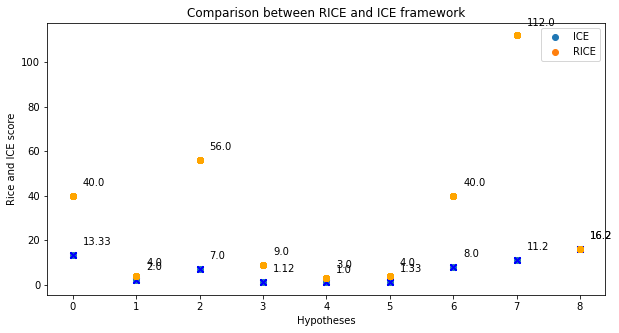

In [20]:
x = data_hypotheses.index.values
y = data_hypotheses['ICE'].values
z = data_hypotheses['RICE'].values
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y,label='ICE')

for i, txt in enumerate(data_hypotheses.ICE):
    txt=round(txt, 2)
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')

ax.scatter(x, z,label='RICE')
for i, txt in enumerate(data_hypotheses.RICE):
    ax.annotate(txt, (x[i], z[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, z, marker='o', color='orange')
    
plt.legend() 
plt.title('Comparison between RICE and ICE framework')
plt.xlabel('Hypotheses')
plt.ylabel('Rice and ICE score')   
plt.show()

### Conclusion
As we can see from the above graph there is difference between the RICE and ICE score which is due to reach parameter. In RICE reach parameter is also consider apart from other parameters. So we can say when we have high reach parameter, it shift the whole RICE score to highest level. for example hypotheses 7 have reach value as 10 which make this hypotheses as highest score value. While ICE consider impact, confidence and effort only. The highest impact, confidence and lowest effort makes ICE score high like hypotheses no 8 is the highest for ICE.

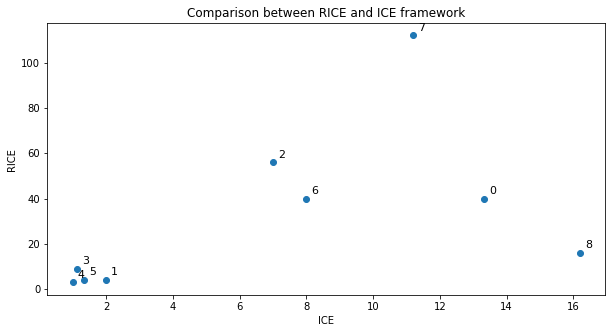

In [21]:
# the reviwer' code:
x = data_hypotheses['ICE'].values
y = data_hypotheses['RICE'].values

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y,)
ax.set_xlabel('ICE')
ax.set_ylabel('RICE')
ax.set_title('Comparison between RICE and ICE framework')

for i, txt in enumerate(data_hypotheses.index.values):
    ax.annotate(txt, (x[i], y[i]), xytext=(5,5), textcoords='offset points', fontsize=11)

<a id='launchABTest'></a>
# Project Part 2: launch an A/B test.

## Description:
We need to perform A/B testing now to determine what effect proposed changes would have. Here we got two files orders_us and visits_us tables. Order table contains all data related to orders by users and visits table contain user's visits related data to the online store. The data in both tables have been splitted into two groups i.e. GroupA and GroupB. GroupB users will get the proposed changes so we will check all metrics in A/B testing to find out how are users responding to the changes and whether it is postive or negative? based on these values we will decide whether we should continue with the changes or not.

In [22]:
#Url Path for the data.
order_url='orders_us.csv'
visit_url='visits_us.csv'

#Loading files locally in to dataframe
data_orders=pd.read_csv(order_url)
data_visits=pd.read_csv(visit_url)
#data_orders.columns=['hypotheses_full']
display(data_orders.head())
display(data_visits.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [23]:
data_orders.info()
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [24]:
#checking for null values.
display(data_orders.isnull().sum())
display(data_visits.isnull().sum())

#checking for duplicate values.
print('Count of duplicate values in order:',data_orders.duplicated(subset=['transactionId','visitorId','date','revenue','group'], keep='first').sum())
print('Count of duplicate values in visits:',data_visits.duplicated(subset=['date','group','visits']).sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date      0
group     0
visits    0
dtype: int64

Count of duplicate values in order: 0
Count of duplicate values in visits: 0


In [25]:
#updating date column datatype to date.
data_orders['date'] = data_orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
data_visits['date'] = data_visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
data_orders.info()
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [26]:
ordersA=data_orders[data_orders.group=='A']
ordersB=data_orders[data_orders.group=='B']
commonusers=ordersA.merge(ordersB, on='visitorId')
commonusers=commonusers[['visitorId']].drop_duplicates()
print(' count of users who falls in both group: ', len(data_orders[data_orders.visitorId.isin(commonusers.visitorId)]))# count of common users who falls in both group.
#data_orders=data_orders[np.logical_not(data_orders.visitorId.isin(commonusers.visitorId))]
#print(data_orders)

 count of users who falls in both group:  181


### Conclusion:
Found 181 users which are common in both groups but if deletes these from order table our conversion data will affected as visits tables contains aggregated data. So as of now not deleting these users.

<a id='analyzeresult'></a>
## Analyze the A/B test:

### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

In [27]:
display(data_orders)
display(data_visits)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [28]:
# building an array with unique paired date-group values 
datesGroups = data_orders[['date','group']].drop_duplicates() 
ordersAggregated=datesGroups.apply(
    lambda x: data_orders[np.logical_and(data_orders['date'] <= x['date'], data_orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max',
          'revenue' : 'sum',
          'transactionId' : pd.Series.nunique, 
          'visitorId': pd.Series.nunique 
         }), 
    axis=1).sort_values(by=['date','group'])
ordersAggregated.rename(columns={'transactionId':'orders','visitorId':'buyers'}, inplace=True)
ordersAggregated

,date,group,revenue,orders,buyers
55,2019-08-01,A,2356.8,24,20
66,2019-08-01,B,1620.0,21,20
175,2019-08-02,A,3860.3,44,38
173,2019-08-02,B,4243.8,45,43
291,2019-08-03,A,5675.5,68,62
...,...,...,...,...,...
496,2019-08-29,B,87343.0,596,544
730,2019-08-30,A,63563.5,545,493
690,2019-08-30,B,90736.3,620,567
958,2019-08-31,A,64554.9,557,503


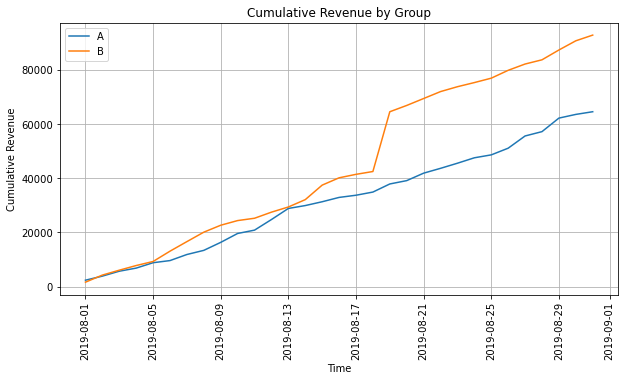

In [29]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = ordersAggregated[ordersAggregated['group']=='A'][['date','revenue','orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = ordersAggregated[ordersAggregated['group']=='B'][['date','revenue','orders']]
plt.figure(figsize=(10,5))

# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title('Cumulative Revenue by Group')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')
plt.xticks(rotation=90)
plt.grid()
plt.show()


##### Conclusion:
As we can see from the above graph cumulative revenue keeps on increasing for both the groups but after 17 august there is spike in revenue for group B. After that also group B keeps higher increase in revenue as compare to group A.

### 2. Graph cumulative average order size by group. Make conclusions and conjectures

In [30]:
ordersAggregated

,date,group,revenue,orders,buyers
55,2019-08-01,A,2356.8,24,20
66,2019-08-01,B,1620.0,21,20
175,2019-08-02,A,3860.3,44,38
173,2019-08-02,B,4243.8,45,43
291,2019-08-03,A,5675.5,68,62
...,...,...,...,...,...
496,2019-08-29,B,87343.0,596,544
730,2019-08-30,A,63563.5,545,493
690,2019-08-30,B,90736.3,620,567
958,2019-08-31,A,64554.9,557,503


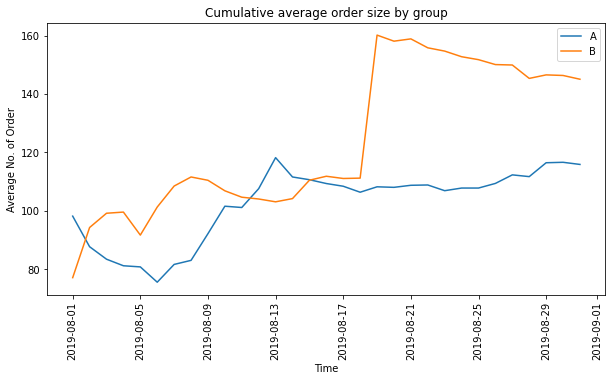

In [31]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cumulative average order size by group')
plt.xlabel('Time')
plt.ylabel('Average No. of Order')
plt.xticks(rotation=90)
plt.show()

##### Conclusion

Group B cumulative average sales drastically increase after 17 august, this may have been due to the presence of large, expensive orders. Later it starts to decrease but it's cumulative revevue still increasing. Also Group A average sales increase in the first quarter but later it becomes steady. At the end both group's cumulative aug. sales become steady.

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

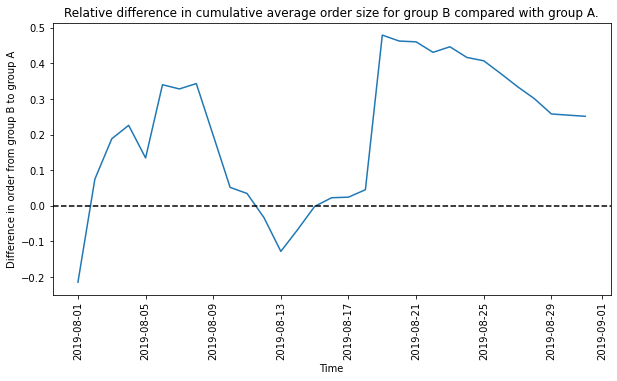

In [32]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Relative difference in cumulative average order size for group B compared with group A.')
plt.xlabel('Time')
plt.ylabel('Difference in order from group B to group A')
plt.xticks(rotation=90)
plt.show()

##### Conclusion:
As we can see from the graph above relative difference in cumulative average order size for group B compared with group A is sudden become high after 17 august but later it starts to decline and at the end it becomes steady.

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [33]:
# getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(lambda x: data_visits[np.logical_and(data_visits['date'] <= x['date'], data_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [34]:
# Merging order and visit table and then caculate conversion.
orderVistscumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
orderVistscumulativeData['conversion'] = orderVistscumulativeData['orders']/orderVistscumulativeData['visits']
orderVistscumulativeData

,date,group,revenue,orders,buyers,visits,conversion
0,2019-08-01,A,2356.8,24,20,719,0.033380
1,2019-08-01,B,1620.0,21,20,713,0.029453
2,2019-08-02,A,3860.3,44,38,1338,0.032885
3,2019-08-02,B,4243.8,45,43,1294,0.034776
4,2019-08-03,A,5675.5,68,62,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,87343.0,596,544,17708,0.033657
58,2019-08-30,A,63563.5,545,493,18037,0.030216
59,2019-08-30,B,90736.3,620,567,18198,0.034070
60,2019-08-31,A,64554.9,557,503,18736,0.029729


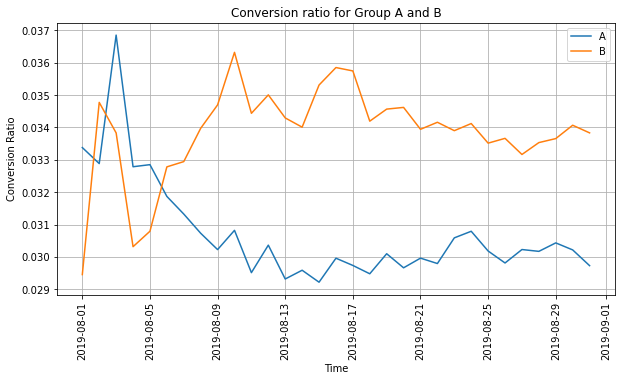

In [35]:
# selecting data on group A 
orderVistscumulativeDataA = orderVistscumulativeData[orderVistscumulativeData['group']=='A']

# selecting data on group B
orderVistscumulativeDataB = orderVistscumulativeData[orderVistscumulativeData['group']=='B']

#set the figure size
plt.figure(figsize=(10,5))

# plotting the graphs
plt.plot(orderVistscumulativeDataA['date'], orderVistscumulativeDataA['conversion'], label='A')
plt.plot(orderVistscumulativeDataB['date'], orderVistscumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Conversion ratio for Group A and B')
plt.xlabel('Time')
plt.ylabel('Conversion Ratio')
plt.xticks(rotation=90)
plt.grid()
plt.show()

##### Conclusion:
Conversion ratio  for both group increase drastically initially and then decrease but after 8 May for Group B again it starts to increase and then fluctuate among some interval. For Group A it decreases and then fluctuate among some interval. Overall Group A conversion is low as compare to Group B. Also it does not seems to be stabilize till the end so it might be too early to draw conclusions about the test. In this case, first we can have a look at the anomalies, they might change the picture in some way.

### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures

In [36]:
orderVistscumulativeData

,date,group,revenue,orders,buyers,visits,conversion
0,2019-08-01,A,2356.8,24,20,719,0.033380
1,2019-08-01,B,1620.0,21,20,713,0.029453
2,2019-08-02,A,3860.3,44,38,1338,0.032885
3,2019-08-02,B,4243.8,45,43,1294,0.034776
4,2019-08-03,A,5675.5,68,62,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,87343.0,596,544,17708,0.033657
58,2019-08-30,A,63563.5,545,493,18037,0.030216
59,2019-08-30,B,90736.3,620,567,18198,0.034070
60,2019-08-31,A,64554.9,557,503,18736,0.029729


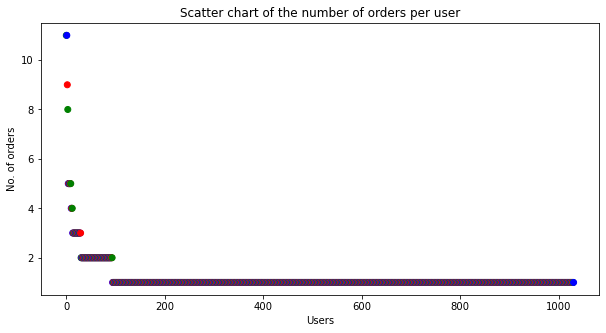

In [37]:
ordersPerUsers=data_orders.groupby('visitorId').agg({'transactionId':pd.Series.nunique}).sort_values(by='transactionId', ascending=False).reset_index()
ordersPerUsers.columns=['users','orders']
#ordersPerUsers
plt.figure(figsize=(10,5))

xVal = range(0, len(ordersPerUsers))

cateVal=0
categories = [0 for i in range(0, len(ordersPerUsers))] # declaring category array and setting default value as 0.
for i in range(0, len(ordersPerUsers)):
    cateVal=cateVal+1
    if (cateVal>2):
        cateVal=0
    categories[i]=cateVal
colormap = np.array(['r', 'g', 'b'])

plt.scatter(xVal, ordersPerUsers['orders'],   c=colormap[categories])

plt.title('Scatter chart of the number of orders per user')
plt.xlabel('Users')
plt.ylabel('No. of orders')
plt.show()

##### Conclusion:
Above graph shows no. of orders per users. We can see from the above graph, most of the users order between 1 and 2 and very few of them order above 4. 

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [38]:

print(np.percentile(ordersPerUsers['orders'], [95, 99]))

[2. 4.]


##### conclusion:
Not more than 5% of users placed more than 2 orders, and only 1% of users made more than 4 orders. So now using these percentile we can define the points at which a data point becomes an anomaly like 1% in this case.

### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

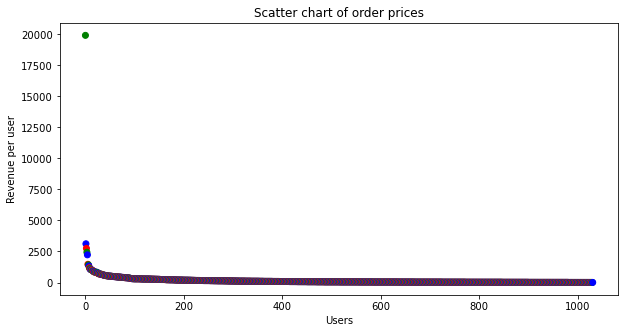

In [39]:
revenuePerUsers=data_orders.groupby('visitorId').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False).reset_index()
revenuePerUsers.columns=['users','revenue']

plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(revenuePerUsers['revenue'])))


cateVal=0
categories = [0 for i in range(0, len(revenuePerUsers['revenue']))] # declaring category array and setting default value as 0.
for i in range(0, len(ordersPerUsers)):
    cateVal=cateVal+1
    if (cateVal>2):
        cateVal=0
    categories[i]=cateVal
colormap = np.array(['r', 'g', 'b'])

plt.scatter(x_values, revenuePerUsers['revenue'] ,c=colormap[categories])
plt.title('Scatter chart of order prices')
plt.xlabel('Users')
plt.ylabel('Revenue per user')
plt.show()

##### conclusion:
The above graph also shows that there are very few users whose generate more than 2500 dollar revenue. 

### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly

In [40]:
print(np.percentile(revenuePerUsers['revenue'], [95, 99]))

[ 510.35 1047.24]


##### Conclusion:
We can see now only very small fraction i.e. less than 1% of users generate revenue more than 2500 dollars.

### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [41]:
ordersByUsersA = data_orders[data_orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = data_orders[data_orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

results = stats.mannwhitneyu(sampleA, sampleB)
grpBCnvrsnRatio=(sampleB.mean()/sampleA.mean()-1)

alpha = .05 #significance level

print("p-Value: {0:.3f}".format(results.pvalue))
print("{0:.3f}".format(grpBCnvrsnRatio) )
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-Value: 0.008
0.138
Null hypothesis rejected: the difference is statistically significant


#####  Conclusion:
**Null Hypothesis H0:** There is no statistically significant difference in conversion between the group A and B based on raw data.<br/>
**Alternative Hypothesis H1:** There is a statistically significant difference in conversion between the group A and B based on raw data.<br/>
As we can see p-value is less than significance value which implies 'Null hypothesis rejected' i.e. There is a statistically significant difference in conversion between the group A and B based on raw data. Also Group B relative conversion seems to be higher than Group A which is around 13.8%

### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [42]:
results=stats.mannwhitneyu(data_orders[data_orders['group']=='A']['revenue'], data_orders[data_orders['group']=='B']['revenue'])
grpBAvgOrdrSize=(data_orders[data_orders['group']=='B']['revenue'].mean()/data_orders[data_orders['group']=='A']['revenue'].mean()-1)

print("p-Value: {0:.3f}".format(results.pvalue))
print('Relative average order size of Group B over Group A: {0:.3f}'.format(grpBAvgOrdrSize))
      
alpha = .05 #significance level
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-Value: 0.346
Relative average order size of Group B over Group A: 0.252
Failed to reject the null hypothesis: we can't make conclusions about the difference


##### Conclusion:
**Null Hypothesis H0:** There is no statistically significant difference in average order size between the Group A and B based on raw data.<br/>
**Alternative Hypothesis H1:** There is a statistically significant difference in average order size between the Group A and B based on raw data.<br/>
The p-value is greater than significance value which implies 'Failed to reject Null hypothesis' i.e. There is no statistically significant difference in average order size between the Group A and B based on raw data. Also Group B relative average order size is better than Group A i.e approx 25.2% higher than Group A.

### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [43]:
order_lim = np.percentile(ordersPerUsers['orders'], 95)
revenue_lim = 1000#np.percentile(revenuePerUsers['revenue'], 99)

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > order_lim]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > order_lim]['userId']], axis = 0)
usersWithExpensiveOrders = data_orders[data_orders['revenue'] > 1000]['visitorId']
#usersWithExpensiveOrders.rename(columns={'visitorId':'userId'})
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(10))
print(abnormalUsers.shape) 

1099     148427295
18       199603092
23       237748145
37       249864742
68       457167155
68       611059232
744      888512513
1103    1164614297
146     1230306981
1136    1307669133
dtype: int64
(29,)


In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data_visits[data_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data_visits[data_visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 
results=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print("{0:.3f}".format(results.pvalue))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
alpha = .05 #significance level
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

0.005
0.174
Null hypothesis rejected: the difference is statistically significant


#####  Conclusion:
**Null Hypothesis H0:** There is no statistically significant difference in conversion between the group A and B based on filtered data.<br/>
**Alternative Hypothesis H1:** There is a statistically significant difference in conversion between the group A and B based on filtered data.<br/>
As we can see p-value is less than significance value which implies 'Null hypothesis rejected' i.e. There is a statistically significant difference in conversion between the group A and B based on filtered data. Also we can say that the results for conversion almost didn't change after removing the outliers. now we can see after removing the outliers Group B relative increase in conversion is 17.4% rather than 13.8%.


### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [46]:
results=stats.mannwhitneyu(
    data_orders[np.logical_and(
        data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    data_orders[np.logical_and(
        data_orders['group']=='B',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('p-value: {0:.3f}'.format(results.pvalue))

print('{0:.3f}'.format(
    data_orders[np.logical_and(data_orders['group']=='B',np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    data_orders[np.logical_and(data_orders['group']=='A',
        np.logical_not(data_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = .05 #significance level
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.419
-0.022
Failed to reject the null hypothesis: we can't make conclusions about the difference


##### Conclusion:
**Null Hypothesis H0:** There is no statistically significant difference in average order size between the group A and B based on filtered data.<br/>
**Alternative Hypothesis H1:** There is a statistically significant difference in average order size between the group A and B based on filtered data.<br/>
The p-value is greater than significance value which implies 'Failed to reject Null hypothesis' i.e. There is no statistically significant difference in average order size between the group A and B based on filtered data which is same as earlier without removing outlier but the relative difference of average order size for Group B is now decreasing as compare to Group A. This is how anomalies changed the conclusion.

### 13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Below are the facts for making our conclusion:
1. All Cumulative matrics shows better result for Group B. 
1. There is a statistically significant differences in conversion between the Groups A and B for both raw and filtered data. Group B's conversion is higher than Group A.
2. Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
3. The graph showing the difference in conversion between the groups tells us that Group B's results are better as compare to Group A but it does not seems to be stabilize till the end .
4. The graph showing the difference in cumulative average order size between the groups tells us that group B's results are better and at the end it starting to becomes steady.


Based on all above points we can say that for maximum matrics Group B is better than Group A. Now we can stop the test, considering Group B is better and can also provide recommendation to marketing department that Group B is better so we can invest in this Group for more revenues/profits.